In [1]:
%load_ext autoreload
%autoreload 1
%aimport coma.utils.visualise

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# setup enviornment for interactive plotting
# !apt-get install -qq xvfb
import os
os.system('/usr/bin/Xvfb :99 -screen 0 1024x768x24 &')
os.environ['DISPLAY'] = ':99'

import panel as pn
pn.extension('vtk')

import pyvista as pv

pv.set_plot_theme("document")

brain1 = pv.read('/vol/biomedic3/bglocker/brainshapes/1000596/T1_first-BrStem_first.vtk')
brain3 = pv.read('/vol/biomedic3/bglocker/brainshapes/1009767/T1_first-BrStem_first.vtk')

dist = np.sqrt(((brain1.points - brain3.points) ** 2).sum(axis=1))
dist = (dist - dist.min()) / (dist.max() - dist.min())

brain1['distance'] = dist

In [71]:
from coma.utils.visualise import plot_mesh_pyvista, plot_meshes_pyvista

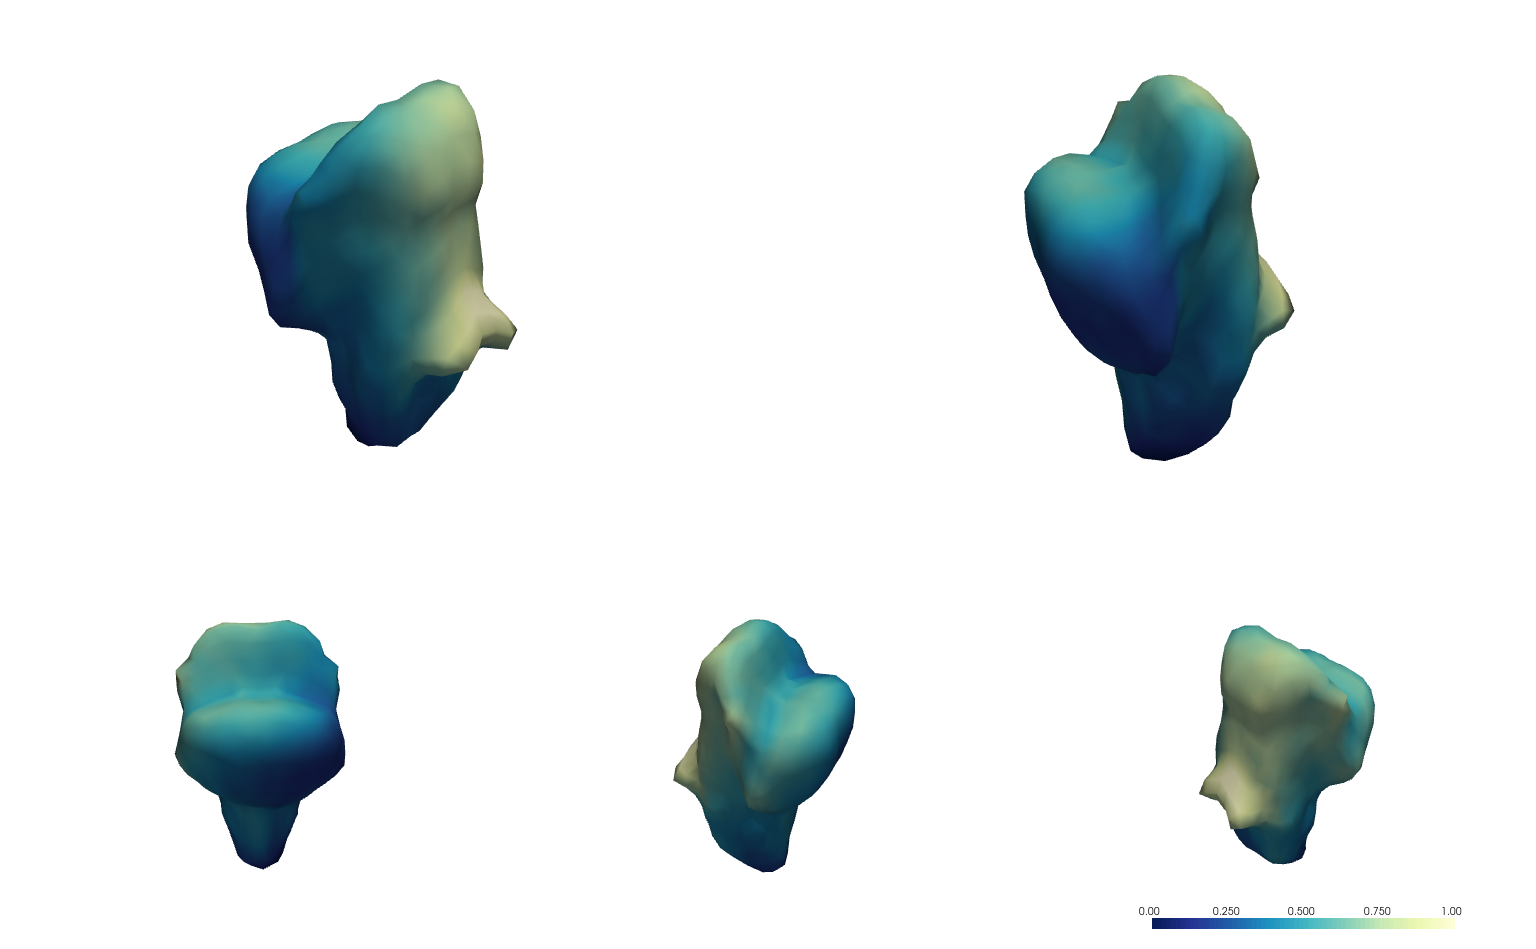

[(140.84702830745886, -36.54941887424282, 160.4693799538822),
 (45.690598487854004, -131.70584869384766, 65.31295013427734),
 (0.0, 0.0, 1.0)]

In [69]:
width = 768 * 2
height = int(width / (1.618))

rotations = [(0, 0, -45), (0, 0, 20), (0, 0, 85), (0, 0, 185), (0, 0, 240)]

plotter = pv.Plotter(
    shape='2/3',
    window_size=(width, height),
    border=False,
    lighting='light_kit',
    off_screen=True,
    notebook=True,
)

plot_mesh_pyvista(
    plotter,
    brain1,
    rotations=rotations,
    vertexcolors=dist,
    vertexscalar='distance',
    title="",
    smooth_shading=True,
    scalar_bar_idx=2,
)

plotter.show()

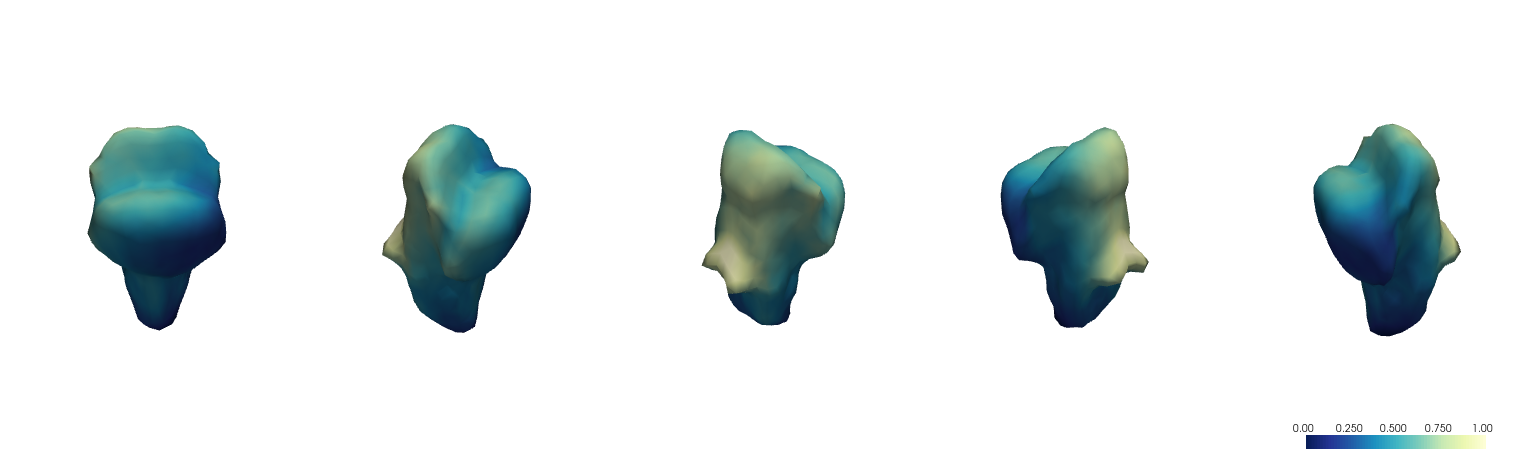

[(189.72470892347997, 12.328261741778306, 209.3470605699033),
 (45.690598487854004, -131.70584869384766, 65.31295013427734),
 (0.0, 0.0, 1.0)]

In [68]:
width = 768 * 2
height = int(width / (1.618 * 2))

rotations = [(0, 0, -45), (0, 0, 20), (0, 0, 85), (0, 0, 185), (0, 0, 240)]

plotter = pv.Plotter(
    shape=(1, 5),
    window_size=(width, height),
    border=False,
    lighting='light_kit',
    off_screen=True,
    notebook=True,
)

plot_mesh_pyvista(
    plotter,
    brain1,
    rotations=rotations,
    vertexcolors=dist,
    vertexscalar='distance',
    title="",
    smooth_shading=True,
    scalar_bar_idx=4,
)

plotter.show()

(5, 642)


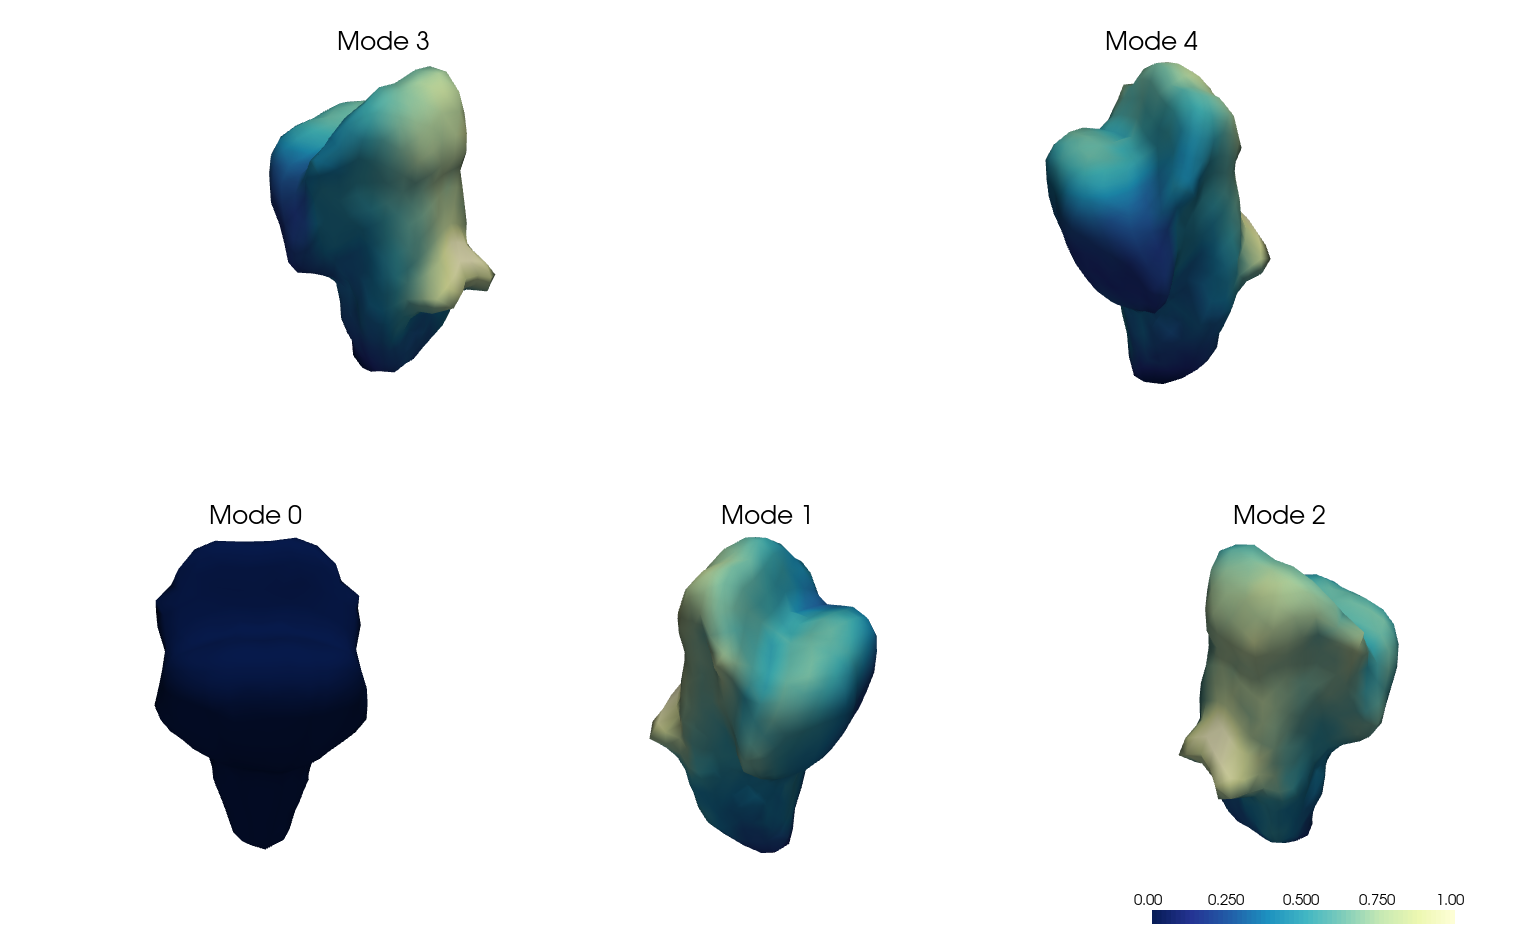

[(140.84702830745886, -36.54941887424282, 160.4693799538822),
 (45.690598487854004, -131.70584869384766, 65.31295013427734),
 (0.0, 0.0, 1.0)]

In [116]:
width = 768 * 2
height = int(width / (1.618))

pv.rcParams['multi_rendering_splitting_position'] = 0.5

rotations = [(0, 0, -45), (0, 0, 20), (0, 0, 85), (0, 0, 185), (0, 0, 240)]

plotter = pv.Plotter(
    shape='2/3',
    window_size=(width, height),
    border=False,
    lighting='light_kit',
    off_screen=True,
    notebook=True,
)

colors = np.repeat(np.expand_dims(dist, 0), len(rotations), 0)
colors[0] = 0
print(colors.shape)

plot_meshes_pyvista(
    plotter,
    [brain1] * len(rotations),
    rotations=rotations,
    vertexcolors=colors,
    vertexscalar='distance',
    smooth_shading=True,
    scalar_bar_idx=2,
    titles=[f'Mode {i}' for i in range(5)],
)

plotter.show()